<a href="https://colab.research.google.com/github/ydchen17/ColabArchive/blob/main/Hotel_booking_demand_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.1 Import packages and dataset

In [ ]:
# a walkthrough provided at https://zhuanlan.zhihu.com/p/268370170 
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
hotel_data = pd.read_csv("/content/drive/MyDrive/H1.csv", index_col=None)
# Check data summary
hotel_data.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,26089.000000,26089.000000,26089.000000,26089.000000,26089.000000,26089.000000,26089.000000,26089.000000,26089.000000,26089.000000,26089.000000,26089.000000,26089.000000,26088.000000,26088.000000,26088.000000,26088.000000,26088.000000
mean,0.425543,96.128982,2015.860746,27.191307,15.700103,1.184982,3.144199,1.864272,0.130515,0.012304,0.050941,0.155621,0.203726,0.246358,0.616222,90.085237,0.111431,0.541168
std,0.494435,98.148532,0.691903,13.736682,8.882387,1.151963,2.463592,0.799522,0.454398,0.111966,0.219882,1.651644,1.218693,0.675674,7.925192,57.455395,0.316250,0.776070
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,2015.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.500000,0.000000,0.000000
50%,0.000000,64.000000,2016.000000,28.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.750000,0.000000,0.000000
75%,1.000000,158.000000,2016.000000,38.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117.800000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,150.000000,508.000000,2.000000,5.000000


In [ ]:
# read data
hotel_data.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3.0,No Deposit,NULL,NULL,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4.0,No Deposit,NULL,NULL,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0.0,No Deposit,NULL,NULL,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0.0,No Deposit,304,NULL,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0.0,No Deposit,240,NULL,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


## 1.2 Dealing with missing data

In [ ]:
# check missing value
hotel_data.isnull().sum()

IsCanceled                       0
LeadTime                         0
ArrivalDateYear                  0
ArrivalDateMonth                 0
ArrivalDateWeekNumber            0
ArrivalDateDayOfMonth            0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                           0
Children                         0
Babies                           0
Meal                             0
Country                        459
MarketSegment                    0
DistributionChannel              0
IsRepeatedGuest                  0
PreviousCancellations            0
PreviousBookingsNotCanceled      0
ReservedRoomType                 0
AssignedRoomType                 0
BookingChanges                   1
DepositType                      1
Agent                            1
Company                          1
DaysInWaitingList                1
CustomerType                     1
ADR                              1
RequiredCarParkingSpaces         1
TotalOfSpecialReques

In [ ]:
data_new = hotel_data.copy()
data_new.drop("Company",axis=1,inplace=True)
data_new.Children.fillna(data_new.Children.median(), inplace=True)
data_new.Country.fillna(data_new.Country.mode()[0],inplace=True)
data_new.Agent.fillna(0, inplace=True)
data_new.Children = data_new.Children.astype(int)
data_new.Meal.replace("Undefined", "SC", inplace=True)
data_new.isnull().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 1
DepositType                    1
Agent                          0
DaysInWaitingList              1
CustomerType                   1
ADR                            1
RequiredCarParkingSpaces       1
TotalOfSpecialRequests         1
ReservationStatus              1
ReservationStatusDate          1
dtype: int

In [ ]:
#remove abnormality
data_new = data_new[data_new["ADR"]<5000]
data_new.isnull().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
ReservationStatusDate          0
dtype: int

## 1.3 Converting data format

In [ ]:
# change month to number
import calendar
month = []
for i in data_new.ArrivalDateMonth:
    mon = list(calendar.month_name).index(i)
    month.append(mon)
data_new.insert(4,"ArrivalMonth",month)

In [ ]:
data_new[["ArrivalDateYear",
          "ArrivalMonth",
          "ArrivalDateDayOfMonth"]] = data_new[["ArrivalDateYear",
                                                "ArrivalMonth",
                                                "ArrivalDateDayOfMonth"]].apply(lambda x:x.astype(str))
date = data_new.ArrivalDateYear.str.cat([data_new.ArrivalMonth,
                                         data_new.ArrivalDateDayOfMonth],
                                        ".")
data_new.insert(3,"ArrivalDate",date)

In [ ]:
data_new = data_new.drop(["ArrivalDateMonth",
                          "ArrivalDateYear",
                          "ArrivalMonth",
                          "ArrivalDateDayOfMonth",
                          "ArrivalDateWeekNumber"],
                         axis=1)
# data_new.columns

In [ ]:
data_new.ReservationStatusDate = pd.to_datetime(data_new.ReservationStatusDate)
data_new.ArrivalDate = pd.to_datetime(data_new.ArrivalDate)

In [ ]:
!curl -O http://txcdn.ydchen.cn/entrez.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  167k  100  167k    0     0   328k      0 --:--:-- --:--:-- --:--:--  328k


In [ ]:
# sns.pairplot(data_new, corner=True)

In [ ]:
cat_feature = ['Meal', 
               'Country',
               "MarketSegment",
               "DistributionChannel",
               "ReservedRoomType",
               "AssignedRoomType",
               "DepositType",
               "Agent",
               "CustomerType",
               "ReservationStatus"]
for i in cat_feature:
  data_new[i] = data_new[i].astype('category').cat.codes


#converting dates to unix timestamp
dates = pd.to_datetime(data_new['ArrivalDate'])
data_new['ArrivalDate'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') 
dates = pd.to_datetime(data_new['ReservationStatusDate'])
data_new['ReservationStatusDate'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
data_new.drop('ReservationStatus', axis=1, inplace=True)


In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26088 entries, 0 to 26087
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   26088 non-null  int64  
 1   LeadTime                     26088 non-null  int64  
 2   ArrivalDate                  26088 non-null  int64  
 3   StaysInWeekendNights         26088 non-null  int64  
 4   StaysInWeekNights            26088 non-null  int64  
 5   Adults                       26088 non-null  int64  
 6   Children                     26088 non-null  int64  
 7   Babies                       26088 non-null  int64  
 8   Meal                         26088 non-null  int8   
 9   Country                      26088 non-null  int8   
 10  MarketSegment                26088 non-null  int8   
 11  DistributionChannel          26088 non-null  int8   
 12  IsRepeatedGuest              26088 non-null  int64  
 13  PreviousCancella

## 1.4 Data Normalisation

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#trans = MinMaxScaler()
#data_new = pd.DataFrame(trans.fit_transform(data_new))
# data_new.columns
#from sklearn.preprocessing import MinMaxScaler
#trans = MinMaxScaler()
#data_new = pd.DataFrame(trans.fit_transform(data_new))
#from sklearn.model_selection import train_test_split
#X = data_new.drop([0], axis = 1)
#y = data_new[0]

In [ ]:
from sklearn.model_selection import train_test_split
X = data_new.drop(["IsCanceled"], axis = 1)
y = data_new["IsCanceled"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier   
from sklearn.ensemble import RandomForestClassifier   
from sklearn.linear_model import LogisticRegression  
from sklearn.dummy import DummyClassifier

## 1.5 Dummy classification

In [ ]:
# establish baseline performance
# Step 1: Declare variable with model Object
dummy = DummyClassifier()
# Step 2: Fit the train data in the model
dummy.fit(X_train, y_train)
# Step 3: Make a prediction using the trained model 
dummy_pred = dummy.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


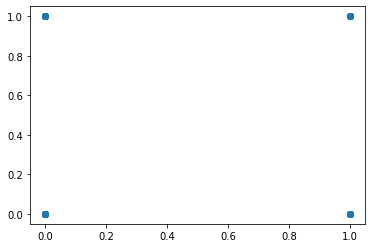

In [ ]:
plt.scatter(y_test, dummy_pred)

In [ ]:
from sklearn.metrics import mean_squared_error, f1_score, confusion_matrix, classification_report
print(np.sqrt(mean_squared_error(y_test, dummy_pred)))
print(confusion_matrix(y_test, dummy_pred))
print(classification_report(y_test, dummy_pred))

0.698791597832997
[[1746 1251]
 [1297  924]]
              precision    recall  f1-score   support

           0       0.57      0.58      0.58      2997
           1       0.42      0.42      0.42      2221

    accuracy                           0.51      5218
   macro avg       0.50      0.50      0.50      5218
weighted avg       0.51      0.51      0.51      5218



## 1.5 Decision Tree classification

In [ ]:
# Step 1: Declare variable with model Object
dt = DecisionTreeClassifier()
# Step 2: Fit the train data in the model
dt.fit(X_train, y_train)
# Step 3: Make a prediction using the trained model 
dt_pred = dt.predict(X_test)

In [ ]:
print(np.sqrt(mean_squared_error(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))
from sklearn import tree
tree.export_text(dt)

0.21176583319881212
[[2900   97]
 [ 137 2084]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2997
           1       0.96      0.94      0.95      2221

    accuracy                           0.96      5218
   macro avg       0.96      0.95      0.95      5218
weighted avg       0.96      0.96      0.96      5218



'|--- feature_1 <= 1468584000.00\n|   |--- feature_8 <= 82.50\n|   |   |--- feature_12 <= 0.50\n|   |   |   |--- feature_17 <= 0.50\n|   |   |   |   |--- feature_1 <= 1460203200.00\n|   |   |   |   |   |--- feature_24 <= 1435017600.00\n|   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |--- feature_24 >  1435017600.00\n|   |   |   |   |   |   |--- feature_1 <= 1458388800.00\n|   |   |   |   |   |   |   |--- feature_7 <= 2.50\n|   |   |   |   |   |   |   |   |--- feature_1 <= 1457438400.00\n|   |   |   |   |   |   |   |   |   |--- feature_14 <= 3.50\n|   |   |   |   |   |   |   |   |   |   |--- feature_8 <= 50.50\n|   |   |   |   |   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |   |   |   |   |   |--- feature_8 >  50.50\n|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5\n|   |   |   |   |   |   |   |   |   |--- feature_14 >  3.50\n|   |   |   |   |   |   |   |   |   |   |--- feature_18 <= 84.00\n|   |   |   |   |   |   |   |   |   |   | 

## 1.7 Random Forest classification

In [ ]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
hotel_new = pd.DataFrame(trans.fit_transform(data_new))

# Step 1: Declare variable with model Object
rf = RandomForestClassifier()
# Step 2: Fit the train data in the model
rf.fit(X_train, y_train)
# Step 3: Make a prediction using the trained model 
rf_pred = rf.predict(X_test)

In [ ]:
print(np.sqrt(mean_squared_error(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print(f1_score(y_test, rf_pred))

0.19528752475425934
[[2946   51]
 [ 148 2073]]
0.9542002301495973


## 2.1 H2 dataset cleaning

In [ ]:
hotel_data2 = pd.read_csv("/content/drive/MyDrive/H2.csv", index_col=None)
hotel_data = pd.read_csv("/content/drive/MyDrive/H1.csv", index_col=None)
hotel_data["Hotel"] = "Resort Hotel"
hotel_data2["Hotel"] = "City Hotel"
hotel = pd.concat([hotel_data,hotel_data2])
# Check data summary
hotel.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,52108.000000,52108.000000,52108.000000,52108.000000,52108.000000,52108.000000,52108.000000,52108.000000,52104.000000,52108.000000,52107.000000,52107.000000,52106.000000,52106.000000,52106.000000,52106.000000,52106.000000
mean,0.602172,109.032701,2015.885258,27.737986,15.566343,0.985377,2.725551,1.861365,0.107727,0.007772,0.077917,0.102002,0.189498,4.141845,94.064591,0.058918,0.427839
std,0.489454,110.162009,0.659813,14.099858,8.811208,1.064439,2.108683,0.658525,0.413306,0.098139,1.171260,0.868320,0.627534,24.809006,52.598404,0.236531,0.718077
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,24.000000,2015.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,0.000000,0.000000
50%,1.000000,74.000000,2016.000000,29.000000,15.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.410000,0.000000,0.000000
75%,1.000000,163.000000,2016.000000,39.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.500000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,30.000000,20.000000,391.000000,5400.000000,2.000000,5.000000


In [ ]:
# check missing value
hotel.isnull().sum()

IsCanceled                       0
LeadTime                         0
ArrivalDateYear                  0
ArrivalDateMonth                 0
ArrivalDateWeekNumber            0
ArrivalDateDayOfMonth            0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                           0
Children                         4
Babies                           0
Meal                             0
Country                        481
MarketSegment                    0
DistributionChannel              0
IsRepeatedGuest                  0
PreviousCancellations            1
PreviousBookingsNotCanceled      1
ReservedRoomType                 1
AssignedRoomType                 1
BookingChanges                   2
DepositType                      2
Agent                            2
Company                          2
DaysInWaitingList                2
CustomerType                     2
ADR                              2
RequiredCarParkingSpaces         2
TotalOfSpecialReques

In [ ]:
hotel_new = hotel.copy()
hotel_new.drop("Company",axis=1,inplace=True)
hotel_new.Children.fillna(hotel_new.Children.median(), inplace=True)
hotel_new.Country.fillna(hotel_new.Country.mode()[0],inplace=True)
hotel_new.Agent.fillna(0, inplace=True)
hotel_new.Children = hotel_new.Children.astype(int)
hotel_new.Meal.replace("Undefined", "SC", inplace=True)
hotel_new.isnull().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          1
PreviousBookingsNotCanceled    1
ReservedRoomType               1
AssignedRoomType               1
BookingChanges                 2
DepositType                    2
Agent                          0
DaysInWaitingList              2
CustomerType                   2
ADR                            2
RequiredCarParkingSpaces       2
TotalOfSpecialRequests         2
ReservationStatus              2
ReservationStatusDate          2
Hotel     

In [ ]:
#remove abnormality
hotel_new = hotel_new[hotel_new["ADR"]<5000]
hotel_new.isnull().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
ReservationStatusDate          0
Hotel     

## 2.2 H2 data transformation

In [ ]:
# change month to number
import calendar
month = []
for i in hotel_new.ArrivalDateMonth:
    mon = list(calendar.month_name).index(i)
    month.append(mon)
hotel_new.insert(4,"ArrivalMonth",month)

In [ ]:
hotel_new[["ArrivalDateYear",
          "ArrivalMonth",
          "ArrivalDateDayOfMonth"]] = hotel_new[["ArrivalDateYear",
                                                "ArrivalMonth",
                                                "ArrivalDateDayOfMonth"]].apply(lambda x:x.astype(str))
date2 = hotel_new.ArrivalDateYear.str.cat([hotel_new.ArrivalMonth,
                                         hotel_new.ArrivalDateDayOfMonth],
                                        ".")
hotel_new.insert(3,"ArrivalDate",date)

In [ ]:
hotel_new = hotel_new.drop(["ArrivalDateMonth",
                          "ArrivalDateYear",
                          "ArrivalMonth",
                          "ArrivalDateDayOfMonth",
                          "ArrivalDateWeekNumber",
                          'ReservationStatus'],
                         axis=1)

In [ ]:
#converting dates to unix timestamp
hotel_new.ReservationStatusDate = pd.to_datetime(hotel_new.ReservationStatusDate)
hotel_new.ArrivalDate = pd.to_datetime(hotel_new.ArrivalDate)

dates = pd.to_datetime(hotel_new['ArrivalDate'])
hotel_new['ArrivalDate'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') 
dates = pd.to_datetime(hotel_new['ReservationStatusDate'])
hotel_new['ReservationStatusDate'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [ ]:
hotel_new

,IsCanceled,LeadTime,ArrivalDate,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate,Hotel
0,0,342,1435708800,0,0,2,0,0,BB,PRT,Direct,Direct,0,0.0,0.0,C,C,3.0,No Deposit,NULL,0.0,Transient,0.00,0.0,0.0,1435708800,Resort Hotel
1,0,737,1435708800,0,0,2,0,0,BB,PRT,Direct,Direct,0,0.0,0.0,C,C,4.0,No Deposit,NULL,0.0,Transient,0.00,0.0,0.0,1435708800,Resort Hotel
2,0,7,1435708800,0,1,1,0,0,BB,GBR,Direct,Direct,0,0.0,0.0,A,C,0.0,No Deposit,NULL,0.0,Transient,75.00,0.0,0.0,1435795200,Resort Hotel
3,0,13,1435708800,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0.0,0.0,A,A,0.0,No Deposit,304,0.0,Transient,75.00,0.0,0.0,1435795200,Resort Hotel
4,0,14,1435708800,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0.0,0.0,A,A,0.0,No Deposit,240,0.0,Transient,98.00,0.0,1.0,1435881600,Resort Hotel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26013,1,246,1468281600,1,3,2,0,0,BB,DEU,Online TA,TA/TO,0,0.0,0.0,A,A,2.0,No Deposit,9,0.0,Transient,101.70,0.0,2.0,1471132800,City Hotel
26014,1,155,1468281600,1,3,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0.0,0.0,A,A,0.0,Non Refund,58,0.0,Transient,130.00,0.0,0.0,1491350400,City Hotel
26015,1,155,1468281600,1,3,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0.0,0.0,A,A,0.0,Non Refund,58,0.0,Transient,130.00,0.0,0.0,1491350400,City Hotel
26016,1,309,1468540800,1,3,2,0,0,SC,HUN,Online TA,TA/TO,0,0.0,0.0,A,A,0.0,No Deposit,9,0.0,Transient,99.00,0.0,0.0,1466121600,City Hotel


## 2.3 H2 dataviz

<Figure size 2880x720 with 0 Axes>

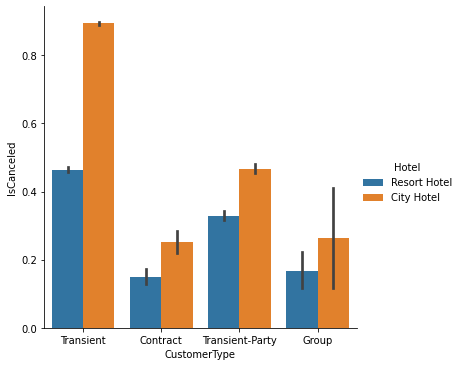

In [ ]:
plt.figure(figsize=(40,10))
sns.catplot(x="CustomerType", y="IsCanceled", hue='Hotel', kind='bar', data=hotel_new)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0, 0.5, 'Night count')

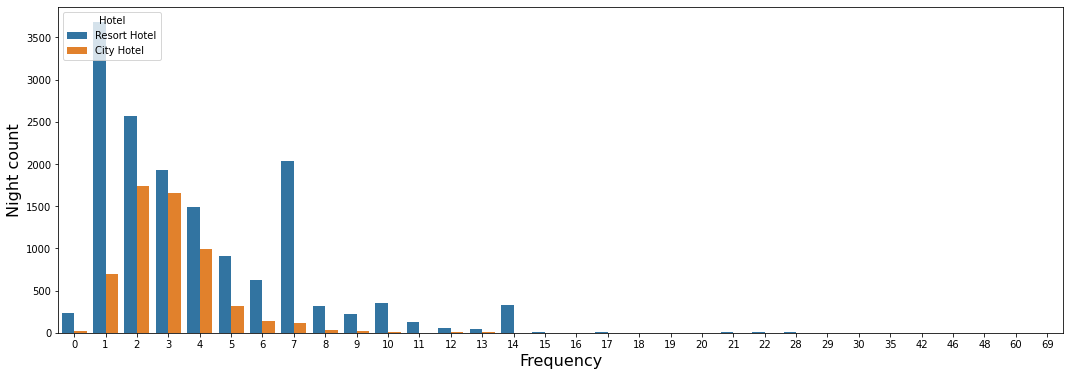

In [ ]:
rh = hotel_new[(hotel_new["Hotel"]=="Resort Hotel") & (hotel_new["IsCanceled"]==0)]
ch = hotel_new[(hotel_new["Hotel"]=="City Hotel") & (hotel_new["IsCanceled"]==0)]

rh["TotalNights"] = rh["StaysInWeekendNights"] + rh["StaysInWeekNights"]
ch["TotalNights"] = ch["StaysInWeekendNights"] + ch["StaysInWeekNights"]
rh_nights_count = rh["TotalNights"].value_counts().reset_index().rename(columns={"index":"Nights","TotalNights":"Visits"})
ch_nights_count = ch["TotalNights"].value_counts().reset_index().rename(columns={"index":"Nights","TotalNights":"Visits"})
rh_nights_count["Hotel"] = "Resort Hotel"
ch_nights_count["Hotel"] = "City Hotel"
all_nights_count = pd.concat([rh_nights_count,ch_nights_count],ignore_index=True)

plt.figure(figsize=(18,6))
sns.barplot(x="Nights",y="Visits",hue="Hotel",data=all_nights_count)

plt.xlabel("Frequency",fontsize=16)
plt.ylabel("Night count",fontsize=16)

## 2.4 categorical data encoding

In [ ]:
cat_feature = ['Meal', 
               'Country',
               "MarketSegment",
               "DistributionChannel",
               "ReservedRoomType",
               "AssignedRoomType",
               "DepositType",
               "Agent",
               "CustomerType"]
for i in cat_feature:
  hotel_new[i] = hotel_new[i].astype('category').cat.codes

hotel_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52105 entries, 0 to 26017
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   52105 non-null  int64  
 1   LeadTime                     52105 non-null  int64  
 2   ArrivalDate                  52105 non-null  int64  
 3   StaysInWeekendNights         52105 non-null  int64  
 4   StaysInWeekNights            52105 non-null  int64  
 5   Adults                       52105 non-null  int64  
 6   Children                     52105 non-null  int64  
 7   Babies                       52105 non-null  int64  
 8   Meal                         52105 non-null  int8   
 9   Country                      52105 non-null  int16  
 10  MarketSegment                52105 non-null  int8   
 11  DistributionChannel          52105 non-null  int8   
 12  IsRepeatedGuest              52105 non-null  object 
 13  PreviousCancella

In [ ]:
cityh = hotel_new[hotel_new["Hotel"]=="City Hotel"]
cityh = cityh.drop(["Hotel"],axis=1)

In [ ]:
cityh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26017 entries, 0 to 26017
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   26017 non-null  int64  
 1   LeadTime                     26017 non-null  int64  
 2   ArrivalDateYear              26017 non-null  int64  
 3   ArrivalMonth                 26017 non-null  int64  
 4   ArrivalDateWeekNumber        26017 non-null  int64  
 5   ArrivalDateDayOfMonth        26017 non-null  int64  
 6   StaysInWeekendNights         26017 non-null  int64  
 7   StaysInWeekNights            26017 non-null  int64  
 8   Adults                       26017 non-null  int64  
 9   Children                     26017 non-null  int64  
 10  Babies                       26017 non-null  int64  
 11  Meal                         26017 non-null  int8   
 12  Country                      26017 non-null  int16  
 13  MarketSegment   

## 2.5 preparation of training/testing datasets

In [ ]:
trans = MinMaxScaler()
cityh = pd.DataFrame(trans.fit_transform(cityh))
X = cityh.drop([0], axis = 1)
y = cityh[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

## 2.6 H2 dummy classification

In [ ]:
# establish baseline performance
# Step 1: Declare variable with model Object
dummy = DummyClassifier()
# Step 2: Fit the train data in the model
dummy.fit(X_train, y_train)
# Step 3: Make a prediction using the trained model 
dummy_pred = dummy.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, dummy_pred)))
print(confusion_matrix(y_test, dummy_pred))
print(f1_score(y_test, dummy_pred))


0.5952670100220568
[[ 215  934]
 [ 910 3145]]
0.7732972707155151


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


## 2.7 H2 decision tree classification

In [ ]:
# Step 1: Declare variable with model Object
dt = DecisionTreeClassifier()
# Step 2: Fit the train data in the model
dt.fit(X_train, y_train)
# Step 3: Make a prediction using the trained model 
dt_pred = dt.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

from sklearn import tree
tree.export_text(dt)

0.16284367666089974
[[1073   76]
 [  62 3993]]
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      1149
         1.0       0.98      0.98      0.98      4055

    accuracy                           0.97      5204
   macro avg       0.96      0.96      0.96      5204
weighted avg       0.97      0.97      0.97      5204



'|--- feature_24 <= 0.29\n|   |--- feature_17 <= 0.25\n|   |   |--- feature_24 <= 0.19\n|   |   |   |--- feature_1 <= 0.02\n|   |   |   |   |--- feature_24 <= 0.17\n|   |   |   |   |   |--- feature_0 <= 0.03\n|   |   |   |   |   |   |--- feature_1 <= 0.01\n|   |   |   |   |   |   |   |--- class: 0.0\n|   |   |   |   |   |   |--- feature_1 >  0.01\n|   |   |   |   |   |   |   |--- feature_24 <= 0.17\n|   |   |   |   |   |   |   |   |--- class: 1.0\n|   |   |   |   |   |   |   |--- feature_24 >  0.17\n|   |   |   |   |   |   |   |   |--- class: 0.0\n|   |   |   |   |   |--- feature_0 >  0.03\n|   |   |   |   |   |   |--- feature_24 <= 0.15\n|   |   |   |   |   |   |   |--- class: 1.0\n|   |   |   |   |   |   |--- feature_24 >  0.15\n|   |   |   |   |   |   |   |--- feature_1 <= 0.00\n|   |   |   |   |   |   |   |   |--- feature_9 <= 0.50\n|   |   |   |   |   |   |   |   |   |--- class: 1.0\n|   |   |   |   |   |   |   |   |--- feature_9 >  0.50\n|   |   |   |   |   |   |   |   |   |--- f

## 2.7 H2 decision tree classification

In [ ]:
# Step 1: Declare variable with model Object
rf = RandomForestClassifier()
# Step 2: Fit the train data in the model
rf.fit(X_train, y_train)
# Step 3: Make a prediction using the trained model 
rf_pred = rf.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


0.15498382053366033
[[1080   69]
 [  56 3999]]
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      1149
         1.0       0.98      0.99      0.98      4055

    accuracy                           0.98      5204
   macro avg       0.97      0.96      0.96      5204
weighted avg       0.98      0.98      0.98      5204

